<a href="https://colab.research.google.com/github/AVData/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Agustin_Vargas_LS_DS10_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


# **1) Generating a Numeric Confidence Interval**

In [3]:
# TODO - your code!

import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

voting_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                          header=None,
                          names=column_headers,
                          na_values='?')

voting_data.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [4]:
# replce the 'y' and 'n's with 1s and 0s using a dictionary

voting_data = voting_data.replace({'y': 1, 'n': 0})

voting_data.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Break down the data into reps and dems

reps = voting_data[voting_data['party'] == 'republican']

dems = voting_data[voting_data['party'] == 'democrat']

In [24]:
reps.head(10)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0
11,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,NaN,NaN
14,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN
15,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,0.0,NaN
18,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,0.0,0.0
28,republican,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


In [25]:
dems.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [6]:
dems = dems.fillna(dems.mean())
reps = reps.fillna(reps.mean())

print(reps.head())
dems.head()

         party  handicapped-infants  ...  duty-free  south-africa
0   republican                  0.0  ...   0.000000      1.000000
1   republican                  0.0  ...   0.000000      0.657534
7   republican                  0.0  ...   0.089744      1.000000
8   republican                  0.0  ...   0.000000      1.000000
10  republican                  0.0  ...   0.000000      0.000000

[5 rows x 17 columns]


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,0.604651,1.0,1.0,0.054054,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,1.0,0.0,0.0
3,democrat,0.000000,1.0,1.0,0.000000,0.215686,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.0,0.0,1.0
4,democrat,1.000000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.144578,1.000000,1.0,1.0,1.0
5,democrat,0.000000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,1.0
6,democrat,0.000000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.289683,1.0,1.0,1.0


In [0]:
# dems = dems.mean()
# print(dems)

# reps = reps.mean()
# reps

In [28]:
# filling the na values with the mean

# Try leaving it as a pandas dataframe, but still use the .fillna method using
# the link that Aaron provided

"""Attempted to use the following to fill the NaN values with the means of their
respective columns but plotting wouldn't work the same; instead, in order to
keep it as a pandas dataframe, I used df.fillna(df.mean()) to replace the NaN
values with the means of their respective columns as shown in previous cell"""

# dems_education = np.array(dems['education'].fillna(value=(np.mean(dems['education']))))
# dems_handicapped_infants = np.array(dems['handicapped-infants'].fillna(value=(np.mean(dems['handicapped-infants']))))
# dems_water_project = np.array(dems['water-project'].fillna(value=(np.mean(dems['water-project']))))
# dems_budget = np.array(dems['budget'].fillna(value=(np.mean(dems['budget']))))
# dems_physician_fee_freeze = np.array(dems['physician-fee-freeze'].fillna(value=(np.mean(dems['physician-fee-freeze']))))
# dems_immigration = np.array(dems['immigration'].fillna(value=(np.mean(dems['immigration']))))

"Attempted to use the following to fill the NaN values with the means of their\nrespective columns but plotting wouldn't work the same; instead, in order to\nkeep it as a pandas dataframe, I used df.fillna(df.mean()) to replace the NaN\nvalues with the means of their respective columns as shown in previous cell"

In [0]:
# getting rid of NaN values

# col = reps['budget']
# reps_budget = col[~np.isnan(col)]

# col = dems['budget']
# dems_budget = col[~np.isnan(col)]

In [0]:
# Building a confidence interval using formula from lecture

from scipy import stats

def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/(n**(1/2))
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean - moe, mean, mean + moe)

In [55]:
# The confidence interval with the margins of error here are +/- ~0.05
col = dems['budget']
dems_budget = col[~np.isnan(col)]
print(confidence_interval(dems_budget, confidence=.95))

(0.8509598821757811, 0.8884615384615384, 0.9259631947472957)


# **2) Generating a Graphical Representation of a Confidence Interval**

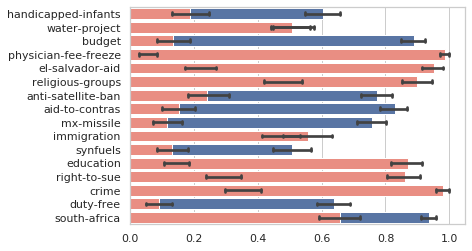

In [11]:
# Generating a barplot for all the means of dems data

# Title: Democrat Support for Issues of the 1980s

x_vals = ['handicapped-infants','water-project',
          'budget','physician-fee-freeze', 'el-salvador-aid',
          'religious-groups','anti-satellite-ban',
          'aid-to-contras','mx-missile','immigration',
          'synfuels', 'education', 'right-to-sue','crime','duty-free', 
          'south-africa']


import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

dems_plot = sns.barplot(y=None, x=None, orient='h', data=dems, ci=95, 
                        color='b', capsize=.2)
reps_plot = sns.barplot(y=None, x=None, data=reps, orient='h', ci=95, 
                        color='salmon', capsize=.2)
# plt.legend((dems_plot[0], reps_plot[0]), ('Dems', 'Reps'))
plt.show()

# **3) Interpretting the Confidence Interval: What does it tell us about the data and distribution?**


*   The above figure provides a graphical representation of the voting data collected from the 1980's voting issues, with respect to party; where the blue bars represent the House Democrats voting averages and the pink bars the House Republican voting averages.  The black error bars represent the margin of error of the mmean, with a 95% confidence interval.  The overlapping error bars show that both party representatives voted similarly on some of the issues; namely, the Water Project, and Immigration.  Where in the majority of the other issues party representatives voted along partisan lines.



*   The error bars provide the insight that we are 95% confident there is a chance our mean is in fact within the true population mean, given that we use a 95% confidence interval.

# **Chi Squared Tests**

**Take a data set use in the past that has categorical variables.  Pick two of those variables and run a chi-squared tests on that data**



*   By hand using Numpy
*   In a single line using Scipy



**By hand using Numpy**

In [91]:
# Choosing data

voting_data = voting_data.fillna(voting_data.mean())
voting_data.head

<bound method NDFrame.head of           party  handicapped-infants  ...  duty-free  south-africa
0    republican              0.00000  ...   0.000000      1.000000
1    republican              0.00000  ...   0.000000      0.812689
2      democrat              0.44208  ...   0.000000      0.000000
3      democrat              0.00000  ...   0.000000      1.000000
4      democrat              1.00000  ...   1.000000      1.000000
..          ...                  ...  ...        ...           ...
430  republican              0.00000  ...   0.000000      1.000000
431    democrat              0.00000  ...   0.000000      1.000000
432  republican              0.00000  ...   0.000000      1.000000
433  republican              0.00000  ...   0.000000      1.000000
434  republican              0.00000  ...   0.427518      0.000000

[435 rows x 17 columns]>

In [94]:
print(voting_data.describe())
voting_data.describe(exclude='number')

       handicapped-infants  water-project  ...   duty-free  south-africa
count            435.00000     435.000000  ...  435.000000    435.000000
mean               0.44208       0.503876  ...    0.427518      0.812689
std                0.49030       0.472136  ...    0.479083      0.340732
min                0.00000       0.000000  ...    0.000000      0.000000
25%                0.00000       0.000000  ...    0.000000      0.812689
50%                0.00000       0.503876  ...    0.000000      1.000000
75%                1.00000       1.000000  ...    1.000000      1.000000
max                1.00000       1.000000  ...    1.000000      1.000000

[8 rows x 16 columns]


,party
count,435
unique,2
top,democrat
freq,267


In [97]:
# creating the categorical variables to do the chi^2 test

cut_points = [0, 1, 'nan']
label_names = ['Oppose', 'For']
voting_data['Handicapped_infants_voting_patterns'] = pd.cut(voting_data['handicapped-infants'],
                                                            cut_points, labels=label_names)
voting_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/tile.py:259: RuntimeWarning: invalid value encountered in less
  if (np.diff(bins.astype("float64")) < 0).any():


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa,Handicapped_infants_voting_patterns
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000,Oppose
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689,Oppose
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,Oppose
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000,Oppose
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000,For


In [99]:
voting_data['Handicapped_infants_voting_patterns'].value_counts()

Oppose    248
For       187
Name: Handicapped_infants_voting_patterns, dtype: int64

In [101]:
contingency_table = pd.crosstab(voting_data['party'],
                                voting_data['Handicapped_infants_voting_patterns'], 
                                margins=True)

contingency_table

Handicapped_infants_voting_patterns,Oppose,For,All
party,,,
democrat,111,156,267
republican,137,31,168
All,248,187,435


In [107]:
observed = pd.crosstab(voting_data['party'],
                       voting_data['Handicapped_infants_voting_patterns'])

print(observed.shape)
observed

(2, 2)


Handicapped_infants_voting_patterns,Oppose,For
party,,
democrat,111,156
republican,137,31


In [124]:
# Creating the rows and columns to calculate by hand

row_sums = contingency_table.iloc[0:2, 2].values
col_sums = contingency_table.iloc[2, 0:2].values

print(row_sums)
print(col_sums)

[267 168]
[248 187]


In [125]:
# What is the sample size?  We can get it from the crosstab
total = contingency_table.loc['All', 'All']
total

435

In [126]:
# We can also just find it using the .shape[0] method

voting_data.shape[0]

435

In [0]:
# Using the for loop created by Ryan in class we can create the expected values 
# to use in the expected values contingency table

expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)

In [128]:
# The shape of our table should match our contingency table
expected.shape

(2, 2)

In [129]:
# the table should also match the table below generated by scipy,
# if it doesn't we have made a mistake

print(expected)

[[152.22068966 114.77931034]
 [ 95.77931034  72.22068966]]


In [0]:
chi_squared = ((observed - expected)**2/(expected)).sum()
dof = (len(row_sums)-1)*(len(col_sums)-1)


In [139]:
from scipy import stats

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f'Chi-squared: {chi_squared}')
print(f'P-value: {p_value}')
print(f'Degrees of Freedom: {dof}')
print('Expected: \n', np.array(expected))

Chi-squared: 65.61213802379619
P-value: 5.489959811311431e-16
Degrees of Freedom: 1
Expected: 
 [[152.22068966 114.77931034]
 [ 95.77931034  72.22068966]]


**Calculating a chi^2 in a single line using Scipy**

In [140]:
from scipy.stats.distributions import chi2

print('P-value from chi^2 statistic:', chi2.sf(chi_squared, 1))

P-value from chi^2 statistic: 5.489959811311431e-16


# **Stretch Goals**

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)